
# Linear Regression

#### Task:  Predict the percentage of the marks of students based on the number of study hours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Overview

In [2]:
score_df=pd.read_csv("scores.csv")

In [3]:
score_df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Preprocessing

In [4]:
score_df.isna().sum()

Hours     0
Scores    0
dtype: int64

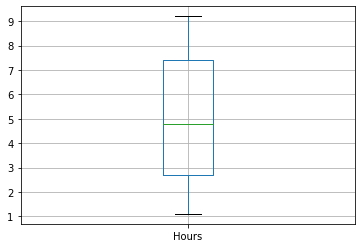

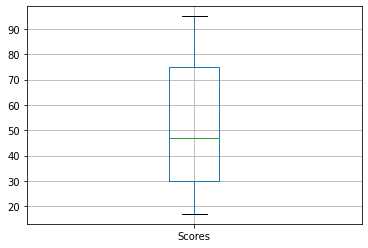

In [5]:
for columns in score_df.columns:
    plt.figure()
    score_df.boxplot([columns])

- No missing values and outliers present in the data set

## Data Visualization

In [6]:
score_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


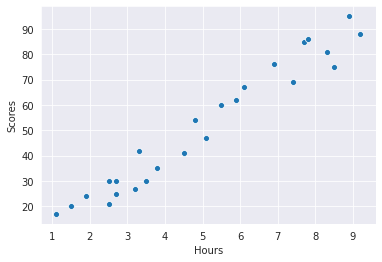

In [7]:
sns.set_style("darkgrid")
sns.scatterplot(data=score_df,x="Hours",y="Scores");

- shows direct correlation between hours studied and scores

## Training The Algorithm

#### Divide data into attributes and labels

In [8]:
X=score_df.iloc[:,:-1].values
y = score_df.iloc[:, 1].values 

#### Spliting data into train and test sets for training

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

#### Training

In [11]:
regressor.fit(X_train,y_train)
print("Training Complete")

Training Complete


#### Plotting regression line

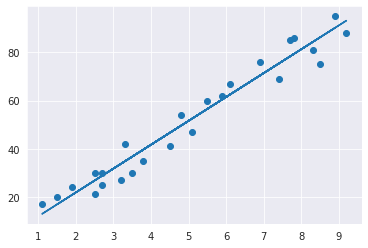

In [12]:
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

#### Making Predictions

In [13]:
print(X_test)
y_pred=regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error={}".format(MAE))

Mean Absolute Error=4.183859899002982


#### Evaluating the performance of the model

In [15]:
hours=9.25
hours_arr=np.array(hours).reshape(-1,1)
predict_score=regressor.predict(hours_arr)
print("No of hours = {}".format(hours))
print("Predicted Score={}".format(predict_score[0]))

No of hours = 9.25
Predicted Score=93.69173248737539
